In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits import mplot3d

# Chapter 1 Molecular Mechanics and Potentials

## Lennard-Jones Potential

The Lennard Jones potential is used to describe the interation between uncharged, not chemically bonded atoms. We have an attractive term given by the London-Formula

\begin{equation*}
V = - \frac{C}{r^6}
\end{equation*}

and a repulsive term given by a equation of the form

\begin{equation*}
V = \frac{C_n}{r^n}
\end{equation*}

The typicall **Lennard-Jones-(12,6)-Potential** has the following form

\begin{equation*}
V(r) = 4 \epsilon \left( \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right)
\end{equation*}

where $\epsilon$ is the depth of the potential well and $\sigma$ is the distance at which the potential is zero.


In [16]:
# Define the Lennard-Jones 12-6 potential function
def lennard_jones_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def lennard_jones_attractive(r,epsilon,sigma):
    return -4 *epsilon * (sigma/r)**6

def lennard_jones_repsulsive(r,epsilon,sigma):
    return 4 * epsilon * (sigma/r)**12


def plot_lj_potential(epsilon=1.0, sigma=1.0):
    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = lennard_jones_potential(r, epsilon, sigma)

    # Add attractive and repulsive components
    V_attractive = lennard_jones_attractive(r, epsilon, sigma)

    V_repulsive = lennard_jones_repsulsive(r, epsilon, sigma)

    
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'ε={epsilon}, σ={sigma}')
    plt.plot(r, V_attractive, label='Attractive Component', linestyle='--', color='blue')
    plt.plot(r, V_repulsive, label='Repulsive Component', linestyle='--', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Lennard-Jones 12-6 Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget
interact(plot_lj_potential, epsilon=(0.1, 2.0, 0.1), sigma=(0.5, 2.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='epsilon', max=2.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_lj_potential(epsilon=1.0, sigma=1.0)>

## Buckingham Potential

The Buckingham potential is a formula which describes the Pauli-Exclusion principle and the van-der-Waals energy $\Phi_{12}(r)$ between two atoms that are not directly bonded. It is given by the following equation:

\begin{equation*}
\Phi_{12}(r) = A \cdot e^{-Br} - \frac{C}{r^6}
\end{equation*}

where $A,B,C$ are constants

In [17]:
def buckingham_potential(r,A,B,C):
    return A * np.exp(-B * r) - C / r**6

def plot_buckingham_potential(A=0, B=0, C=0):
    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = buckingham_potential(r, A, B, C)
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'A={A}, B={B}, C={C}')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Buckingham Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()
# Create interactive widget for Buckingham potential

interact(plot_buckingham_potential, A=(-10, 10, 0.1), B=(-10, 10, 0.1), C=(-10, 10, 0.1))


interactive(children=(FloatSlider(value=0.0, description='A', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.plot_buckingham_potential(A=0, B=0, C=0)>

## Morse Potential

The Morse Potential is a formula which describes the electronic potential enerrgy of a two atom sytem respective of the distance between the two atoms

\begin{equation*}
V(r) = D_e \left( 1 - e^{-a(r-r_e)} \right)^2 - D_e
\end{equation*}

where $D_e$ is the depth of the potential well, $a$ is a constant that determines the width of the potential and $r_e$ is the equilibrium distance between the two atoms.

In [18]:
def morse_potential(r,D,a,r0):
    return D * (1 - np.exp(-a * (r - r0)))**2 - D

def plot_morse_potential(D=1, a=1, r0=1):

    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = morse_potential(r, D, a, r0)
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'D={D}, a={a}, r0={r0}')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Morse Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()

interact(plot_morse_potential, D=(-10, 10, 0.1), a=(-10, 10, 0.1), r0=(0.5, 3, 0.1))

interactive(children=(FloatSlider(value=1.0, description='D', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

<function __main__.plot_morse_potential(D=1, a=1, r0=1)>

## Coulomb Potential

For the description of charged species a Coulombic potential is required in addition to the potential for the van-der-Waals interaction

\begin{equation*}
V(r) = \frac{q_1 q_2}{4 \pi \epsilon_0 r}
\end{equation*}

where $q_1$ and $q_2$ are the charges of the two atoms, $\epsilon_0$ is the permittivity of free space and $r$ is the distance between the two atoms.

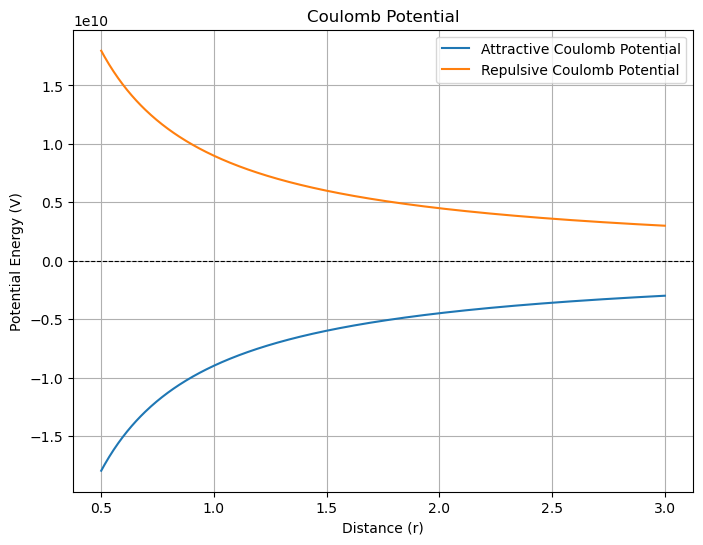

In [19]:
def coulomb_potential(r,q1,q2):
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity
    return (q1 * q2) / (4 * np.pi * epsilon_0 * r)

r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
V_coulomb_attractive = coulomb_potential(r, 1, -1)
V_coulomb_repulsive = coulomb_potential(r, 1, 1)
plt.figure(figsize=(8, 6))
plt.plot(r, V_coulomb_attractive, label='Attractive Coulomb Potential')
plt.plot(r, V_coulomb_repulsive, label='Repulsive Coulomb Potential')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Coulomb Potential')
plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.legend()
plt.grid()
plt.show()


# Chapter 3: Potential Energy Surfaces

**Definition**: The potential energy $V$ of a system determines which structures are likely/unlikely to be observed. Because $V$ is a function of all coordinates of the system, we call it surface in configuration space $\vec{Q}$ being the configuration vector.

In the next visualization we consider x,y to be two coordinates of the system, the potential energy is then a function of these two coordinates. We consider the function $x^2 + y^2 *sin(x)$ as our potential energy function.

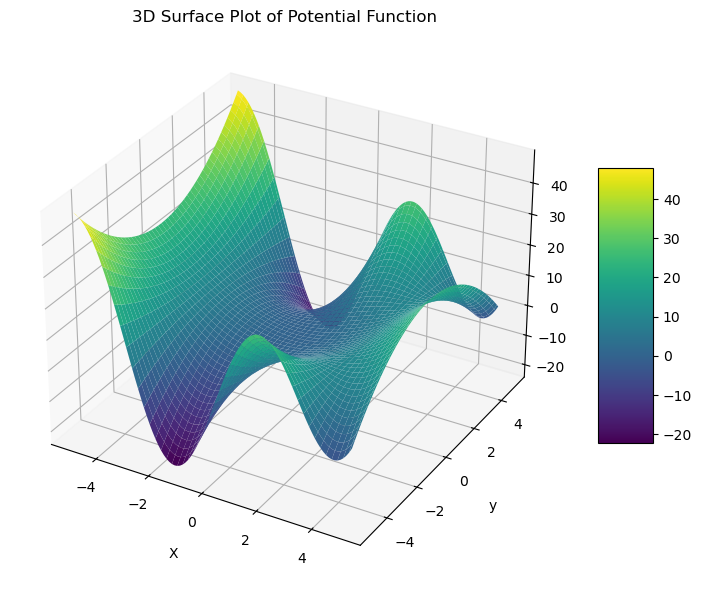

In [33]:
def potential_surface_test_function(x, y):
    return x**2 + y**2 * np.sin(x)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = potential_surface_test_function(X, Y)
# Plot the surface

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot of Potential Function')
ax.set_xlabel('X', labelpad=10)
ax.set_ylabel('y', labelpad=10)
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()



In the description of a chemical system the total energy $E$ plays a crucial role and is given by

\begin{equation*}
E = V + T
\end{equation*}

The total energy determines all the accessible regions:

+ If the potential energy $V$ equals $E$ the kinetic energy $T$ is zero
+ If the potential energy is lower than $E$, the kinetic energy $T$ is non-zero correspoding to thermal energy of the system 

\begin{equation*}
T = \frac{mv^2}{2} = \frac{p^2}{2m} = \frac{3}{2}kT
\end{equation*}

where $m$ is the mass of the particle, $v$ is the velocity, $p$ is the momentum and $k$ is the Boltzmann constant.

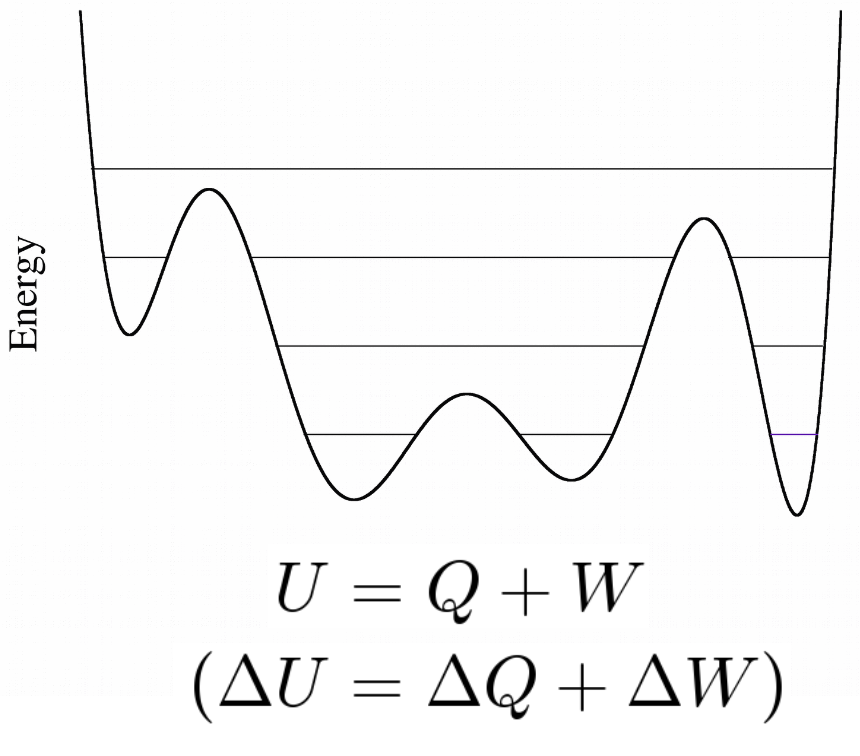

### Derivatives, Hessian, Curvature

The general definition of a derivative is given by the limit. A function $f(x)$ is differentiable at a point $a$ if the following limit exists:

\begin{equation*}
f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
\end{equation*}

Considering a vector-valued function $y(t)$, it can be split up into its components $y_1(t),y_2(t),y_3(t)$. The derivative of the vector function $y(t)$ is defined to be the tanged vectors whose coordinates are the derivatives of the components of $y(t)$:

\begin{equation*}
y'(t) = \lim_{h \to 0} \frac{y(t+h) - y(t)}{h}
\end{equation*}

In general if a function $f$ depends on more variables we can define partial derivatives in respect to the variables.

\begin{equation*}
\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h,y) - f(x,y)}{h}
\end{equation*}

The gradient of a function $f$ is defined as the vector of all partial derivatives:

\begin{equation*}
\nabla f(x,y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
\end{equation*}

If we want to calculate derivatives of a function numerically we have three possibilities:

1. **Forward difference**: $f'(x) = \frac{f(x+h) - f(x)}{h}$
2. **Backward difference**: $f'(x) = \frac{f(x) - f(x-h)}{h}$
3. **Central difference**: $f'(x) = \frac{f(x+h) - f(x-h)}{2h}$



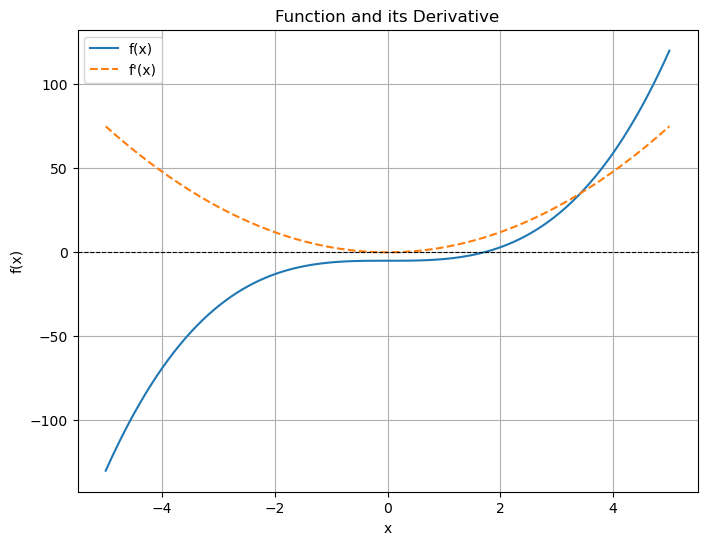

In [40]:
def derivative(f,a,method="central",h=1e-5):
    """ 
    Computes the difference formula for f'(a) with the step size h
    """


    if method=="central":
        return (f(a+h)-f(a-h))/(2*h)
    elif method=="forward":
        return (f(a+h)-f(a))/h
    elif method=="backward":
        return (f(a)-f(a-h))/h
    else:
        raise ValueError("Unknown method. Use 'central', 'forward', or 'backward'.")
    
def f(x):
    return x**3  -5

x = np.linspace(-5, 5, 100)
y = f(x)
y_prime = derivative(f, x, method="central")
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)", linestyle='--')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

We now determine how we can find local minima and maxima of a given function.

**Definition**

Consider a function $f$ which takes values of a subset $D \subset \mathbb{R}^n$:

$f: D \subset \mathbb{R}^n \to \mathbb{R}$ has at $x_0 \in D$:

+ a local minimum if there exists a neighbourhood $U$ of $x_0$ such that $f(x_0) \leq f(x)$ for all $x \in U$
+ a local maximum if there exists a neighbourhood $U$ of $x_0$ such that $f(x_0) \geq f(x)$ for all $x \in U$


An extreme point can be found by setting the gradient to zero:
\begin{equation*}
\nabla f(x_0) = 0
\end{equation*}
This is a necessary condition for a local minimum or maximum. However, it is not sufficient. We need to check the second derivative of the function at the point $x_0$.

The second derivative of a multivariable function is given by the Hessian matrix $H$:

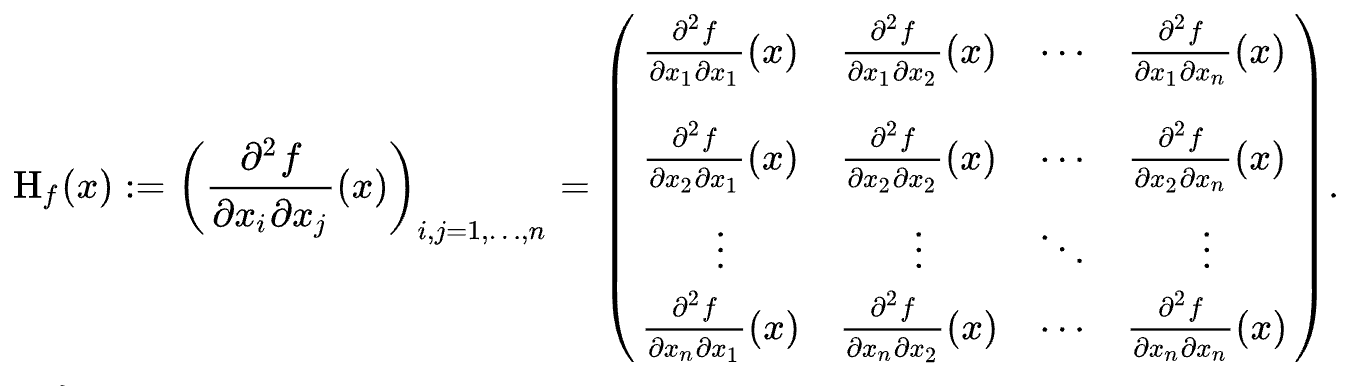


+ Ist die Matrix an einer Stelle positiv definit so befindet man sich im lokalen minimum (>0)
+ Ist sie negativ definit so handelt es sich um ein lokales maximum (<0). 
+ Ist die Matrix indefinit so handelt es sich um einen Sattelpunkt.








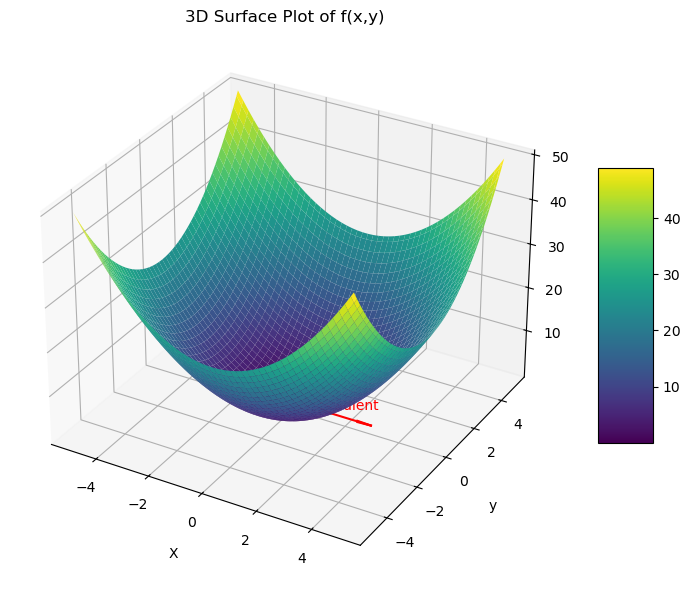

In [51]:
def f(x,y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


# Compute the gradient
def gradient(f, x, y, h=1e-5):
    """ Computes the gradient of f at (x,y) using central difference """
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

# Compute the gradient at a point
x0 = 1
y0 = 0
grad = gradient(f, x0, y0)


# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
# Plot the gradient vector
ax.quiver(x0, y0, f(x0, y0), grad[0], grad[1], 0, length=1, color='red', label='Gradient')
ax.text(x0, y0, f(x0, y0), 'Gradient', color='red')

ax.set_title('3D Surface Plot of f(x,y)')
ax.set_xlabel('X', labelpad=10)
ax.set_ylabel('y', labelpad=10)
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()






### Hessian Matrix Decomposition

The Hessian matrix is square and symmetric it can be decomposed into a diagonal form.

\begin{equation*}
H = Q \Lambda Q^T
\end{equation*}

where $Q$ is an orthogonal matrix and $\Lambda$ is a diagonal matrix. The eigenvalues of the Hessian matrix are the diagonal elements of the matrix $\Lambda$. The eigenvectors are the columns of the matrix $Q$.

Eigenvalues: [1. 2. 3. 4.]
Eigenvectors: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
The Hessian matrix is positive definite --> Minimum


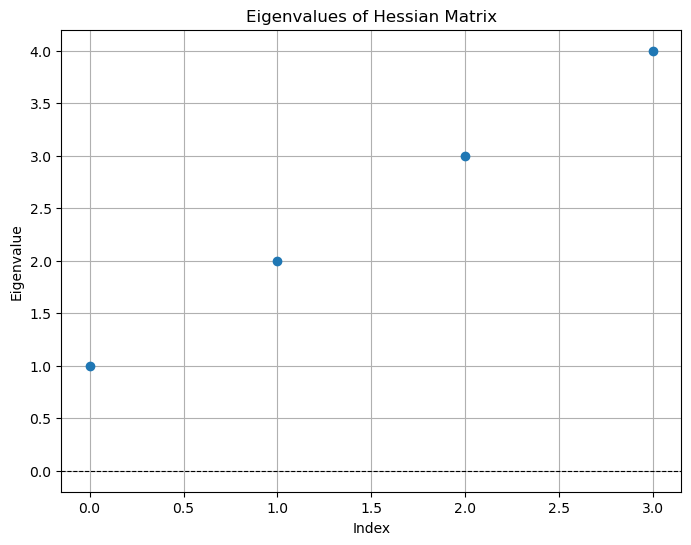

In [67]:
# example hesssian matrix 4x4
hessian_matrix = np.array([[1, 0, 0, 0],
                              [0, 2, 0, 0],
                              [0, 0, 3, 0],
                              [0, 0, 0, 4]])

#calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(hessian_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

if np.all(eigenvalues > 0):
    print("The Hessian matrix is positive definite --> Minimum")
elif np.all(eigenvalues < 0):
    print("The Hessian matrix is negative definite --> Maximum")
# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, 'o')
plt.title('Eigenvalues of Hessian Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

In [68]:
def hessian(x):
    """ 
    Computes the hessian matrix with finite differences

    Parameters:
        - x: ndarray

    Returns:
        - an array of shape (x.dim,x.dim) + x.shape
    """
    x_grad = np.gradient(x)
    hessian = np.empty((x.ndim,x.ndim)+x.shape, dtype=x.dtype)
    for k, grad_k in enumerate(x_grad):
        # iterate over the dimensions 
        # apply gradient to every component of first derivative
        temp_grad = np.gradient(grad_k)
        for l, grad_kl in enumerate(temp_grad):
            hessian[k,l, :, :] = grad_kl
    return hessian

x = np.random.rand(2,2) # makes a 2x2 matrix
hess = hessian(x)
print("Hessian matrix:")
print(hess)


Hessian matrix:
[[[[0.         0.        ]
   [0.         0.        ]]

  [[0.52685649 0.52685649]
   [0.52685649 0.52685649]]]


 [[[0.52685649 0.52685649]
   [0.52685649 0.52685649]]

  [[0.         0.        ]
   [0.         0.        ]]]]
